<h1><center><font size=10>Introduction to LLMs and GenAI</center></font></h1>
<h1><center>Mini Project 3: Attention Mechanism and Transfomers </center></h1>

Business Context

In [ ]:
# installing the sentence-transformers library
!pip install -U sentence-transformers -q

In the dynamic landscape of the media and news industry, the ability to swiftly categorize and curate content has become a strategic imperative. The vast volume of information demands efficient systems to organize and present content to the audience.

The media industry, being the pulse of information dissemination, grapples with the continuous influx of news articles spanning diverse topics. Ensuring that the right articles reach the right audience promptly is not just a logistical necessity but a critical component in retaining and engaging audiences in an age of information overload.

Common Industry Challenges: Amidst the ceaseless flow of news, organizations encounter challenges such as:

Information Overload: The sheer volume of news articles makes manual categorization impractical.
Timeliness: Delays in categorizing news articles can result in outdated or misplaced content.

Problem Statement

E-news Express, a news aggregation startup, faces the challenge of categorizing the news articles collected. With news articles covering sports, entertainment, politics, and more, the need for an advanced and automated system to categorize them has become increasingly evident. The manual efforts required for categorizing such a diverse range of news articles are substantial, and human errors in the categorization of news articles can lead to reputational damage for the startup. There is also the factor of delays and potential inaccuracies. To streamline and optimize this process, the organization recognizes the imperative of adopting cutting-edge technologies, particularly machine learning, to automate and enhance the categorization of content.

As a data scientist on the E-news Express data team, the task is to analyze the text in news articles and build an unsupervised learning model for categorizing them. The categorization done by the model can then be validated against human-defined labels to check the overall accuracy of the AI system. The goal is to optimize the categorization process, ensuring timely and personalized delivery.*

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to compute distances
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

# importing the PyTorch Deep Learning library
import torch

# to import the model
from sentence_transformers import SentenceTransformer

# to cluster the data
from sklearn.cluster import KMeans

# to compute metrics
from sklearn.metrics import classification_report

# to avoid displaying unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Intro to LLM and GenAI/Part-1/Project-3/news_articles.csv")

In [ ]:
df.head(3)

,Text
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n"
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots

Checking a particular data

In [ ]:
df.loc[1,'Text']

'Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland\'s Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland\'s six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee\'s decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King\'s Own Scot

In [ ]:
data = df.drop_duplicates()

# resetting the dataframe index
data.reset_index(drop=True, inplace=True)

data.duplicated().sum()


np.int64(0)

Defining the Model

In [ ]:
""" he_xet is a helper package for enhancing file transformers with the Hugging Face Hub. """
!pip install hf_xet

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Encoding the dataset

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
# encoding the dataset
embedding_matrix = model.encode(data['Text'], show_progress_bar=True, device=device)


Batches:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
embedding_matrix.shape

(2127, 384)

Embedding dimensions for different models

Semantic Search

In [ ]:
# defining a function to compute the cosine similarity between two embedding vectors
def cosine_score(text1,text2):
    # encoding the text
    embeddings1 = model.encode(text1)
    embeddings2 = model.encode(text2)

    # calculating the L2 norm of the embedding vector
    norm1 = np.linalg.norm(embeddings1)
    norm2 = np.linalg.norm(embeddings2)

    # computing the cosine similarity
    cosine_similarity_score = ((np.dot(embeddings1,embeddings2))/(norm1*norm2))

    return cosine_similarity_score


In [ ]:
a= "i love apple"
b= "apple is a fruit"
c= "i like this table"
print(cosine_score(a,b))
print(cosine_score(b,c))
print(cosine_score(a,c))


0.55750257
0.07198238
0.27396187


In [ ]:
# We can also use prebuilt method to calculate similarity score

a= "i love apple"
b= "apple is a fruit"
c= "i like this table"

from sentence_transformers import util

embeddings1 = model.encode(a)
embeddings2 = model.encode(b)
embeddings3 = model.encode(c)

print(util.cos_sim(embeddings1, embeddings2))
print(util.cos_sim(embeddings2, embeddings3))
print(util.cos_sim(embeddings1, embeddings3))


tensor([[0.5575]])
tensor([[0.0720]])
tensor([[0.2740]])


Categorization

We'll use K- Means Clustering to categorize the data


In [ ]:
# defining a function to find the top k similar sentences for a given query
def top_k_similar_sentences(embedding_matrix, query_text, k):
    # encoding the query text
    query_embedding = model.encode(query_text)

    # calculating the cosine similarity between the query vector and all other encoded vectors of our dataset
    score_vector = np.dot(embedding_matrix,query_embedding)

    # sorting the scores in descending order and choosing the first k
    top_k_indices = np.argsort(score_vector)[::-1][:k]

    # returning the corresponding reviews
    return data.loc[list(top_k_indices), 'Text']


In [ ]:
# defining the query text
query_text = "Budget for elections"

# displaying the top 5 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 5)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")


'Debate needed' on donations cap
 
 A cap on donations to political parties should not be introduced yet, the elections watchdog has said.
 
 Fears that big donors can buy political favours have sparked calls for a limit. In a new report, the Electoral Commission says it is worth debating a Â£10,000 cap for the future but now is not the right time to introduce it. It also says there should be more state funding for political parties and candidates should be able to spend more on election campaigning.
 
 There were almost Â£68m in reported donations to political parties in 2001, 2002 and 2003, with nearly Â£12m of them from individual gifts worth more than Â£1m. The rules have already been changed so the public can see who gives how much to the parties but the report says there are still public suspicions. The commission says capping donations would mean taxpayers giving parties more cash - something which would first have to be acceptable to the public and shown to work. "While we are 

In [ ]:
# defining the query text
query_text = "High imports and exports"

# displaying the top 5 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 5)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")


US trade gap ballooned in October
 
 The US trade deficit widened by more than expected in October, hitting record levels after higher oil prices raised import costs, figures have shown
 
 The trade shortfall was $55.5bn (Â£29bn), up 9% from September, the Commerce Department said. That pushed the 10 month deficit to $500.5bn. Imports rose by 3.4%, while exports increased by only 0.6%. A weaker dollar also increased the cost of imports, though this should help drive export demand in coming months. "Things are getting worse, but that's to be expected," said David Wyss of Standard & Poor's in New York. "The first thing is that when the dollar goes down, it increases the price of imports. "We are seeing improved export orders. Things seem to be going in the right direction."
 
 Despite this optimism, significant concerns remain as to how the US will fund its trade and budget deficits should they continue to widen. Another problem highlighted by analysts was the growing trade gap with Chin

In [ ]:
meanDistortions = []
clusters = range(2, 11)

for k in clusters:
    clusterer = KMeans(n_clusters=k, random_state=1)
    clusterer.fit(embedding_matrix)

    prediction = clusterer.predict(embedding_matrix)

    distortion = sum(
        np.min(cdist(embedding_matrix, clusterer.cluster_centers_, "euclidean"), axis=1) ** 2
    )
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)


Number of Clusters: 2 	Average Distortion: 1795.3091159694156
Number of Clusters: 3 	Average Distortion: 1737.2980176833794
Number of Clusters: 4 	Average Distortion: 1666.670281681866
Number of Clusters: 5 	Average Distortion: 1621.4823716961173
Number of Clusters: 6 	Average Distortion: 1591.5027295479538
Number of Clusters: 7 	Average Distortion: 1577.1054012988975
Number of Clusters: 8 	Average Distortion: 1571.6843538453927
Number of Clusters: 9 	Average Distortion: 1559.943300752881
Number of Clusters: 10 	Average Distortion: 1534.3992114469802


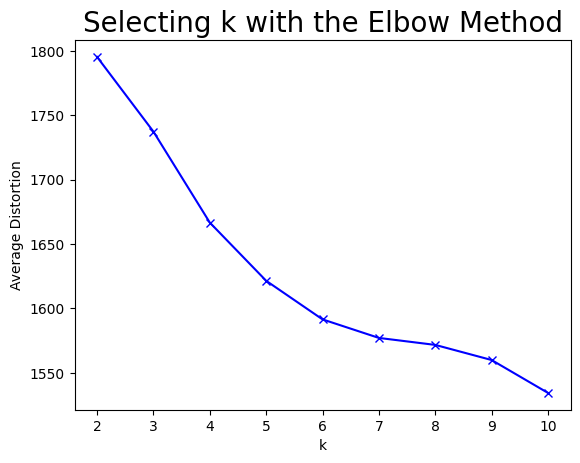

In [ ]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()


In [ ]:
sil_score = []
cluster_list = range(2, 11)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    preds = clusterer.fit_predict((embedding_matrix))

    score = silhouette_score(embedding_matrix, preds)
    sil_score.append(score)

    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))


For n_clusters = 2, the silhouette score is 0.046811509877443314)
For n_clusters = 3, the silhouette score is 0.04964282736182213)
For n_clusters = 4, the silhouette score is 0.06065066531300545)
For n_clusters = 5, the silhouette score is 0.06735046207904816)
For n_clusters = 6, the silhouette score is 0.06096599996089935)
For n_clusters = 7, the silhouette score is 0.05802200734615326)
For n_clusters = 8, the silhouette score is 0.05344569310545921)
For n_clusters = 9, the silhouette score is 0.05067500099539757)
For n_clusters = 10, the silhouette score is 0.045897647738456726)


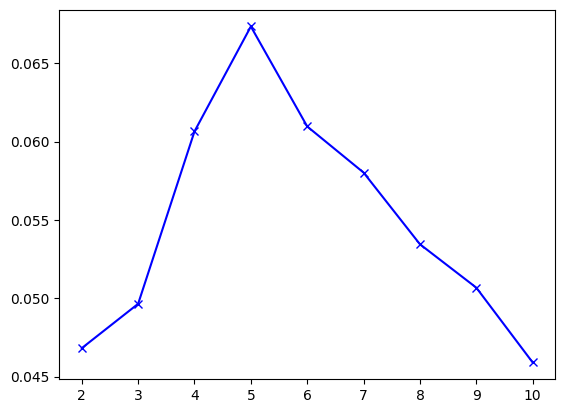

In [ ]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()


In [ ]:
# defining the number of clusters/categories
n_categories = 5

# fitting the model
kmeans=KMeans(n_clusters=n_categories,random_state=1).fit(embedding_matrix)


In [ ]:
# creating a copy of the data
clustered_data = data.copy()

# assigning the cluster/category labels
clustered_data['Category'] = kmeans.labels_

clustered_data.head()


,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",1
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the 

In [ ]:
# for each cluster, printing the 5 random news articles
for i in range(5):
    print("CLUSTER",i)
    print(clustered_data.loc[clustered_data.Category == i, 'Text'].sample(5, random_state=1).values)
    print("*****************************************************************")
    print("\n")


CLUSTER 0
["O'Sullivan keeps his powder dry\n \n When you are gunning for glory and ultimate success keeping the gunpowder dry is essential.\n \n Ireland coach Eddie O'Sullivan appears to have done that quite successfully in the run-up to this season's Six Nations Championship. He decreed after the 2003 World Cup that players should have a decent conditioning period during the year. That became a reality at the end of last summer with a 10-week period at the start of the this season. It may have annoyed his Scottish, and in particularly Welsh, cousins who huffed and puffed at the disrespect apparently shown to the Celtic League. We will say nothing of Mike Ruddock ''poaching'' eight of the Dragons side that faced Leinster on Sunday. But, like O'Sullivan, he was well within his rights, particularly when you are talking about the national side and pride that goes along with it. The IRFU has thrown their weight behind O'Sullivan, who must be glad that in the main, there is centrally-contr

In [ ]:
# dictionary of cluster label to category
category_dict = {
    0: 'Sports',
    1: 'Politics',
    2: 'Entertainment',
    3: 'Business',
    4: 'Technology'
}
# mapping cluster labels to categories
clustered_data['Category'] = clustered_data['Category'].map(category_dict)

clustered_data.head()


,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",Politics
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderer

In [ ]:
# loading the actual labels
labels = pd.read_csv("/content/drive/MyDrive/Intro to LLM and GenAI/Part-1/Project-3/news_article_labels.csv")
# checking the unique labels
labels['Label'].unique()


array(['Politics', 'Sports', 'Technology', 'Entertainment', 'Business'],
      dtype=object)

In [ ]:
# adding the actual categories to our dataframe
clustered_data['Actual Category'] = labels['Label'].values


In [ ]:
print(classification_report(clustered_data['Actual Category'], clustered_data['Category']))

               precision    recall  f1-score   support

     Business       0.96      0.93      0.95       503
Entertainment       0.96      0.95      0.95       369
     Politics       0.96      0.95      0.95       403
       Sports       0.98      0.99      0.99       505
   Technology       0.91      0.97      0.93       347

     accuracy                           0.96      2127
    macro avg       0.95      0.96      0.96      2127
 weighted avg       0.96      0.96      0.96      2127



We were able to categorize the news articles with 96% accuracy

In [ ]:
# creating a dataframe of incorrect categorizations
incorrect_category_data = clustered_data[clustered_data['Actual Category'] != clustered_data['Category']].copy()


In [ ]:
incorrect_category_data.shape


(91, 3)

In [ ]:
idx = 24

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[3]], "euclidean")[0,0])

Distance from Actual Category
0.9545188193646543
Distance from Predicted Category
1.0357047091216722


cdist= to calculate the distance between 2 points


In [ ]:
incorrect_category_data.head()

,Text,Category,Actual Category
24,"'Hitler' row over Welsh arts cash\n \n An artist critical of Welsh arts funding being brought under assembly government control has denied comparing the idea with dictatorships in Russia and Germany.\n \n Shani Rhys James is worried that the Arts Council of Wales may be taken over by the Welsh Assembly Government. Culture Minister Alun Pugh said it would be ""crass and ignorant"" to liken a quango review to Hitler's Germany. But Ms James emphasised she had actually said artists needed freedom. The future of the Arts Council of Wales has been in question since it was announced that most Welsh quangos would eventually be abolished.\n \n It was announced last July that three Welsh quangos, education and training body Elwa, the Wales Tourist Board and the Welsh Development Agency, would be brought under assembly government control. The Arts Council of Wales may be among the next to come under the assembly government's umbrella. But Ms James, who won the Â£30,000 Jerwood painting prize in 2003, said arts funding should be separate from government. Ms James told BBC Radio Wales: ""It's quite dangerous when you involve politicians because it's not like the health service and it's not like the railways. ""Free expression is absolutely vital in a democratic society. You need distance, you do not need government interference because it could be taken the wrong way.""\n \n But she said reports that she had likened the assembly government to totalitarian regimes were inaccurate.\n \n She told Good Morning Wales: ""Just to put the record straight, that business in the paper where it said I likened the government to Bolshevik Russia or Hitler's Germany, the actual quote I gave was: 'It is vital to a civilised society that we allow artists to express themselves without government control'. ""As we know from past European history, i.e. Russia and Germany in the early 20th Century, artists will go underground or leave the country or rather than compromise their expression'. ""Artists need a free voice to express themselves - they reflect a truth through their own art forms.'"" She said the assembly government was not best placed to run the arts in Wales.\n \n She added: ""It would be a momentous change and devastating to the arts. It would set the arts scene back 60 years, because I really don't think the government has the expertise. ""If you have the National Assembly taking control, I fear you are going to be going back to the dragons and leeks and the choirs.\n \n ""Wales has moved on. It is international now. It is not set back in How Green Was My Valley?"" Responding to Ms James' criticisms, Mr Pugh said: ""The structure of unelected quangos is under review and we have made it clear that further announcements are due shortly. ""Comparing the Welsh Assembly Government to Hitler's Germany is a crass and ignorant response to a real issue about democratic accountability."" Ms James, whose father was Welsh, was born in Melbourne where her parents worked in the theatre. She moved to Powys nearly 20 years ago where she works from her studio near Llangadfan. She has won a number of arts prizes including the Wales Open in 1989 and the Mostyn Open in 1991.\n",Entertainment,Politics
34,"Final hunts held as ban looms\n \n Hunts in England and Wales have begun on the last day that hunting with dogs is legal, with more due out later.\n \n Thousands of supporters are expected to turn out at more than 250 meets, many of which have altered their normal schedules to be out on a Thursday. The ban on hunting with dogs comes into effect from 0001 GMT on Friday. The Countryside Alliance had its latest legal bid to block the ban thwarted on Wednesday when the Appeal Court ruled the Hunting Act was lawful.\n \n But the group says hunting will continue in some form after the ban comes in, with hunts expected to test the new law to its limits. Others are expected to defy the ban by continuing to hunt illegally.\n \n Anti-hunt or

In [ ]:
idx = 45

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[4]], "euclidean")[0,0])

Distance from Actual Category
1.0191156343863672
Distance from Predicted Category
1.00801973304675
